In [36]:
import geopandas as gpd
import pandas as pd

### Read the files

In [37]:
user_file = pd.read_csv('users.csv')
marker_file = pd.read_csv('marker_sample_file.csv')
user_file.head()
# user_file['Latcorner1','Latcorner2', 'Latcorner3', 'Latcorner4', 'Longcorner1', 'Longcorner2','Longcorner3', 'Longcorner4']

,User,Email,Latitude Centre,Longitude Centre,Latcorner1,Latcorner2,Latcorner3,Latcorner4,Longcorner1,Longcorner2,Longcorner3,Longcorner4
0,1,mike.oates@hotmail.co.uk,-26.697438,144.761236,-27.297438,-27.297438,-26.097438,-26.097438,144.161236,145.361236,145.361236,144.161236
1,2,test@gmail.com,-23.884613,131.064854,-24.484613,-24.484613,-23.284613,-23.284613,130.464854,131.664854,131.664854,130.464854
2,3,test1@gmail.com,-33.969453,151.235495,-34.569453,-34.569453,-33.369453,-33.369453,150.635495,151.835495,151.835495,150.635495


### Create a wkt column

In [38]:

from shapely import wkt
def createWKT(row):
#     return str(user_file['Longcorner1']) +" "+ str(user_file['Latcorner1']) +" ," + str(user_file['Longcorner2']) +" "+ str(user_file['Latcorner2'])+", "+ str(user_file['Longcorner3']) +" "+ str(user_file['Latcorner3'])+", "+ str(user_file['Longcorner4']) +" "+ str(user_file['Latcorner4'])
    print(row['Longcorner1'])
    return wkt.loads(f"POLYGON(({row['Longcorner1']} {row['Latcorner1']}, {row['Longcorner2']} {row['Latcorner2']}, {row['Longcorner3']} {row['Latcorner3']}, {row['Longcorner4']} {row['Latcorner4']}, {row['Longcorner1']} {row['Latcorner1']}))").wkt

user_file['wkt'] = user_file.apply(createWKT, axis=1)
user_file['wkt'][0]

144.1612364
130.4648544
150.6354947


'POLYGON ((144.1612364 -27.29743797, 145.3612364 -27.29743797, 145.3612364 -26.09743797, 144.1612364 -26.09743797, 144.1612364 -27.29743797))'

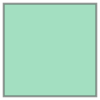

In [39]:
p1 = wkt.loads('POLYGON ((144.1612364 -27.29743797, 145.3612364 -27.29743797, 145.3612364 -26.09743797, 144.1612364 -26.09743797, 144.1612364 -27.29743797))')
p1

### Create user geodataframe from the WKT coordinates

In [40]:
user_file['Coordinates'] = gpd.GeoSeries.from_wkt(user_file['wkt'])
usergdf = gpd.GeoDataFrame(user_file, geometry='Coordinates', crs="EPSG:4326")
usergdf.head()


,User,Email,Latitude Centre,Longitude Centre,Latcorner1,Latcorner2,Latcorner3,Latcorner4,Longcorner1,Longcorner2,Longcorner3,Longcorner4,wkt,Coordinates
0,1,mike.oates@hotmail.co.uk,-26.697438,144.761236,-27.297438,-27.297438,-26.097438,-26.097438,144.161236,145.361236,145.361236,144.161236,"POLYGON ((144.1612364 -27.29743797, 145.361236...","POLYGON ((144.16124 -27.29744, 145.36124 -27.2..."
1,2,test@gmail.com,-23.884613,131.064854,-24.484613,-24.484613,-23.284613,-23.284613,130.464854,131.664854,131.664854,130.464854,"POLYGON ((130.4648544 -24.48461309, 131.664854...","POLYGON ((130.46485 -24.48461, 131.66485 -24.4..."
2,3,test1@gmail.com,-33.969453,151.235495,-34.569453,-34.569453,-33.369453,-33.369453,150.635495,151.835495,151.835495,150.635495,"POLYGON ((150.6354947 -34.56945265, 151.835494...","POLYGON ((150.63549 -34.56945, 151.83549 -34.5..."


### Create a geodataframe from marker sample fil

In [41]:
marker_gdf = gpd.GeoDataFrame(marker_file, geometry=gpd.points_from_xy(marker_file.Longitude, marker_file.Latitude))
marker_gdf

,WKT,Longitude,Latitude,Description,Satellite,Orbit,Time_WST,Date,SatZenith,Confidence,Intensity,geometry
0,POINT (144.7612364 -26.235),144.761236,-26.697438,\n,NOAA-19,64601,4:07,20210821,38.47,-1,-1,POINT (144.76124 -26.69744)
1,POINT (152.745 -26.235),152.745000,-26.235000,\n,NOAA-19,64574,4:07,20210821,38.47,-1,-1,POINT (152.74500 -26.23500)
2,POINT (129.705 -15.125),129.705000,-15.125000,\n,NOAA-19,64575,5:41,20210821,42.83,-1,-1,POINT (129.70500 -15.12500)
3,POINT (129.715 -15.125),129.715000,-15.125000,Possible FHS\n,NOAA-19,64575,5:41,20210821,42.78,-1,-1,POINT (129.71500 -15.12500)
4,POINT (129.725 -15.125),129.725000,-15.125000,Possible FHS\n,NOAA-19,64575,5:41,20210821,42.74,-1,-1,POINT (129.72500 -15.12500)


### Add in rectangle column to users geodataframe

In [42]:
def in_rectangle(row):
    in_rectangle = marker_gdf.within(row['Coordinates'])    
    return True in list(in_rectangle)
        
usergdf['in_rectangle'] = usergdf.apply(in_rectangle, axis=1)
usergdf.head()

,User,Email,Latitude Centre,Longitude Centre,Latcorner1,Latcorner2,Latcorner3,Latcorner4,Longcorner1,Longcorner2,Longcorner3,Longcorner4,wkt,Coordinates,in_rectangle
0,1,mike.oates@hotmail.co.uk,-26.697438,144.761236,-27.297438,-27.297438,-26.097438,-26.097438,144.161236,145.361236,145.361236,144.161236,"POLYGON ((144.1612364 -27.29743797, 145.361236...","POLYGON ((144.16124 -27.29744, 145.36124 -27.2...",True
1,2,test@gmail.com,-23.884613,131.064854,-24.484613,-24.484613,-23.284613,-23.284613,130.464854,131.664854,131.664854,130.464854,"POLYGON ((130.4648544 -24.48461309, 131.664854...","POLYGON ((130.46485 -24.48461, 131.66485 -24.4...",False
2,3,test1@gmail.com,-33.969453,151.235495,-34.569453,-34.569453,-33.369453,-33.369453,150.635495,151.835495,151.835495,150.635495,"POLYGON ((150.6354947 -34.56945265, 151.835494...","POLYGON ((150.63549 -34.56945, 151.83549 -34.5...",False


### Filter the users in where a marker was found

In [43]:

user_in_rectangle = usergdf[usergdf['in_rectangle'] == True]
user_in_rectangle.head()

,User,Email,Latitude Centre,Longitude Centre,Latcorner1,Latcorner2,Latcorner3,Latcorner4,Longcorner1,Longcorner2,Longcorner3,Longcorner4,wkt,Coordinates,in_rectangle
0,1,mike.oates@hotmail.co.uk,-26.697438,144.761236,-27.297438,-27.297438,-26.097438,-26.097438,144.161236,145.361236,145.361236,144.161236,"POLYGON ((144.1612364 -27.29743797, 145.361236...","POLYGON ((144.16124 -27.29744, 145.36124 -27.2...",True


### Save the users meeting the criteria to a csv file

In [44]:
user_in_rectangle.to_csv('user_criteria.csv',index=False, columns=['User', 'Email'])